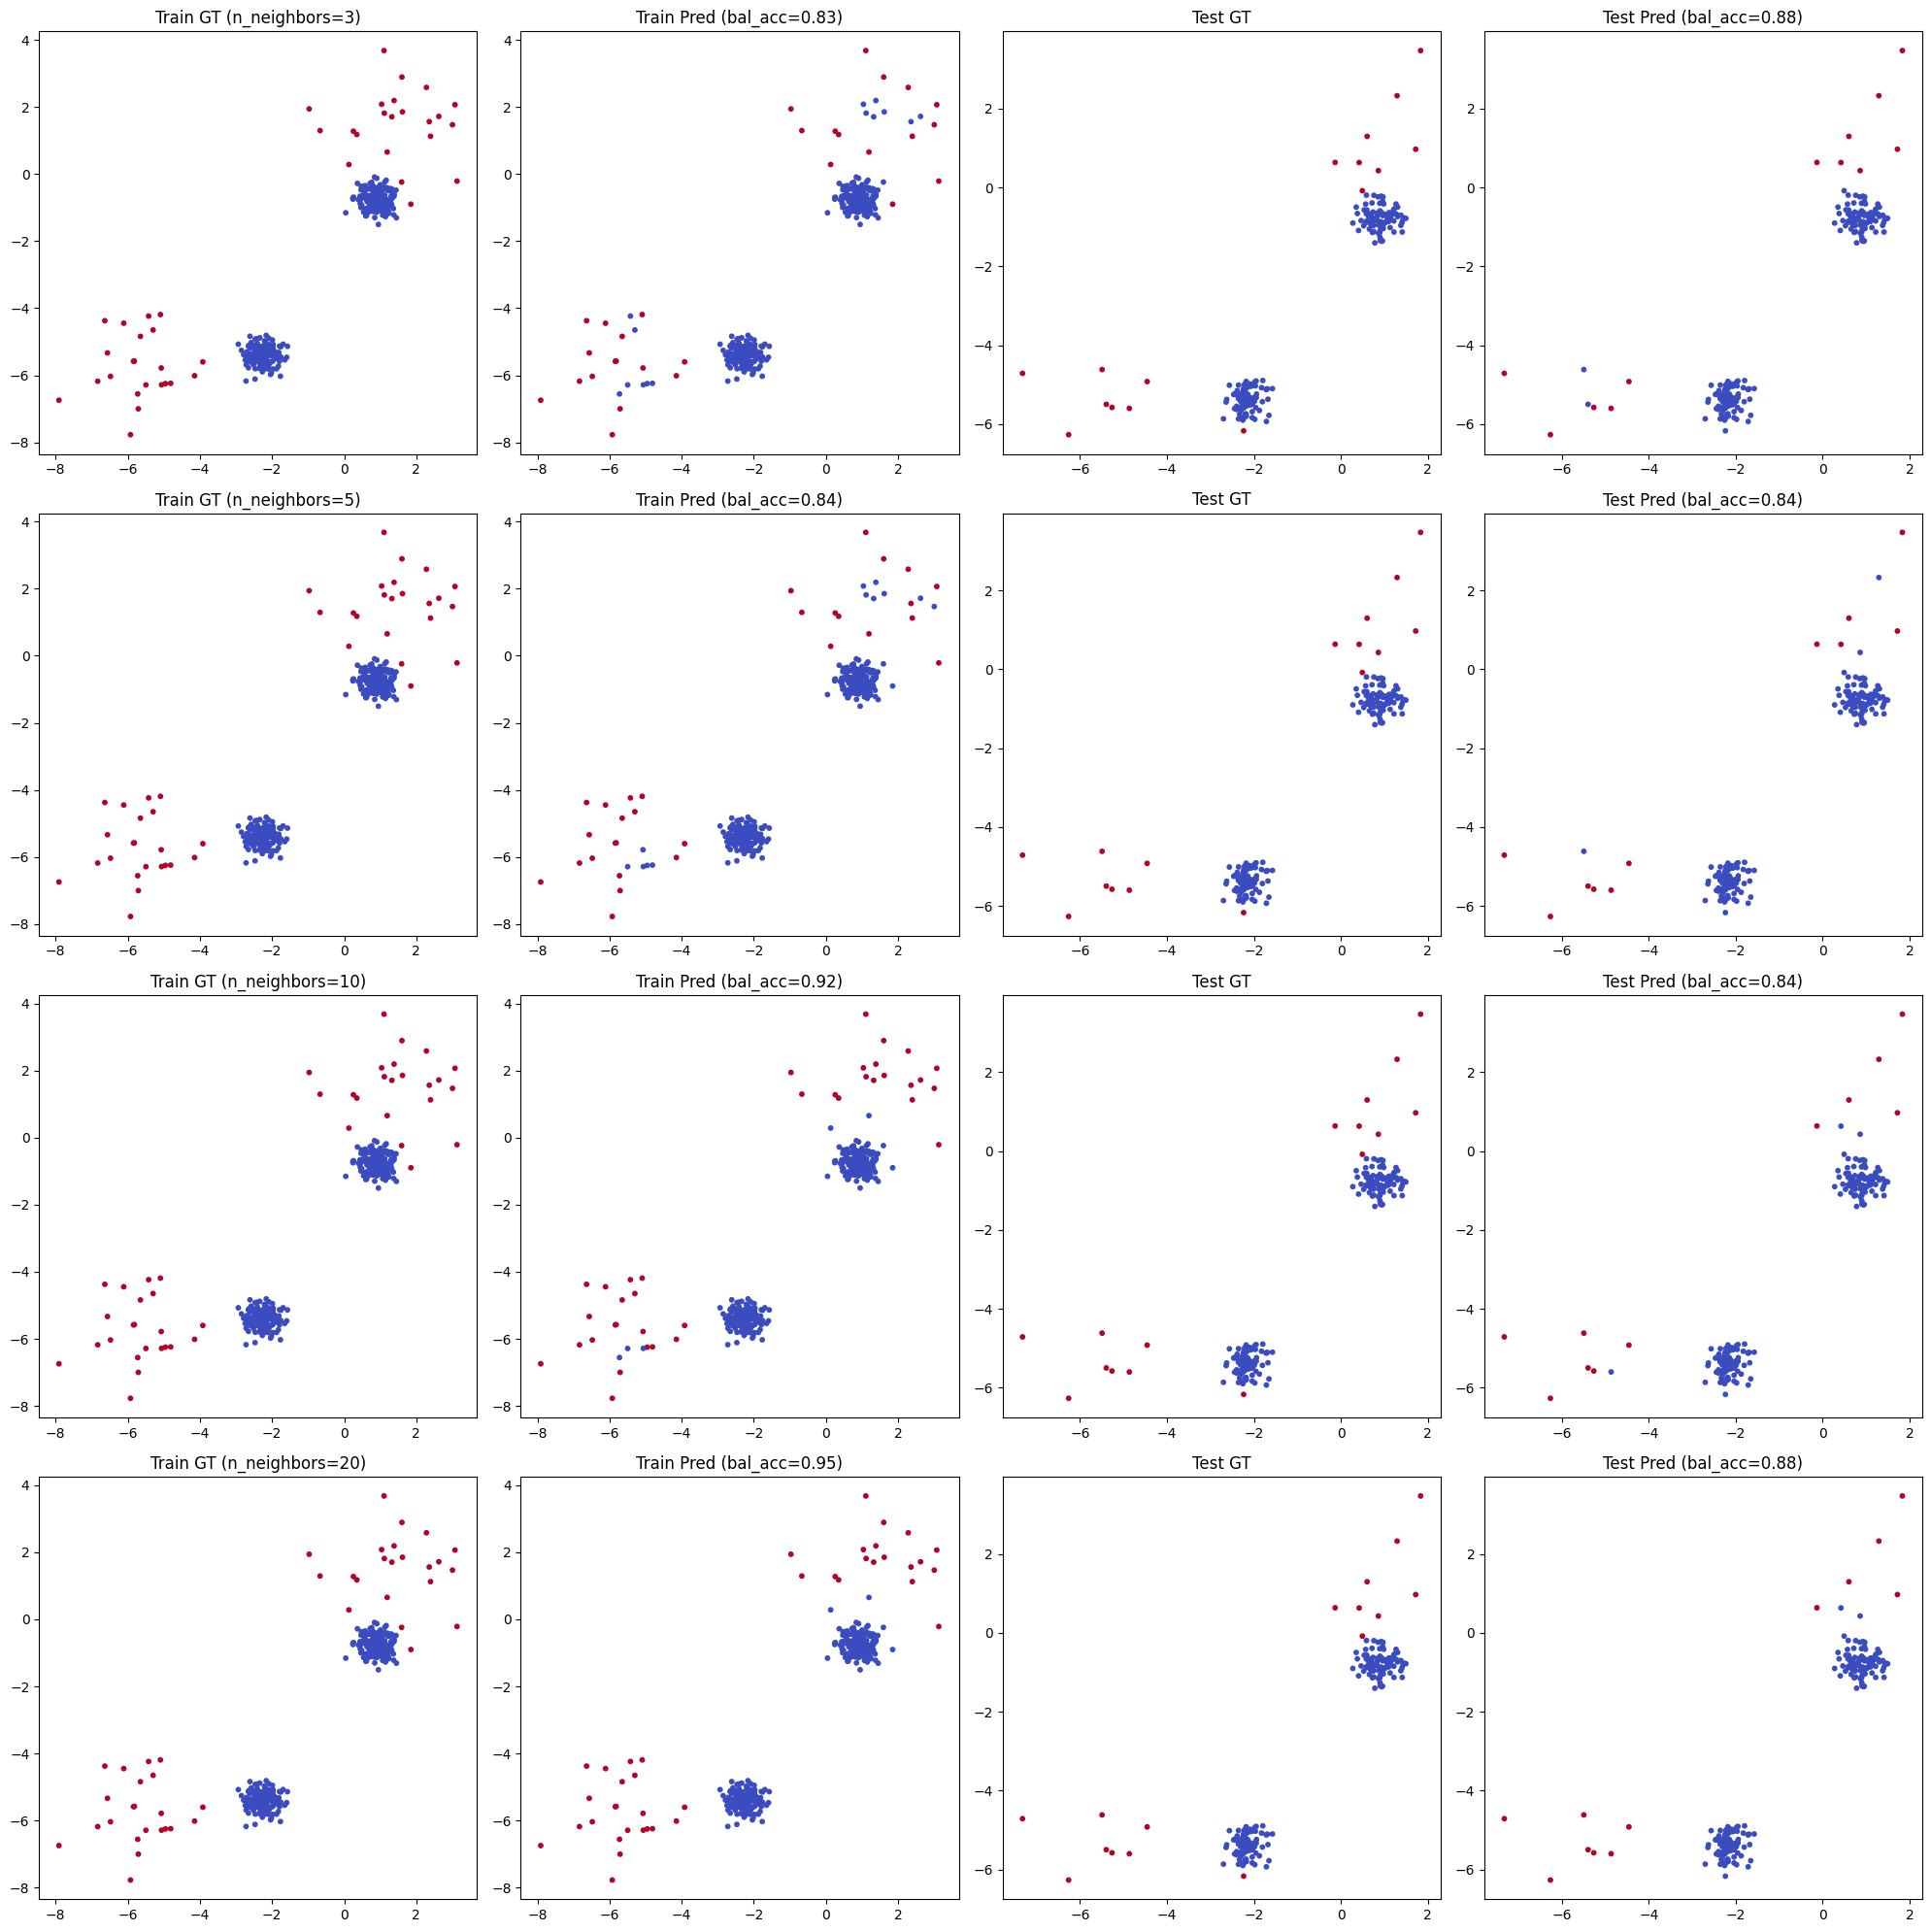

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.data import generate_data_clusters
from sklearn.metrics import balanced_accuracy_score

# data -  2 clusters, 2D, 0.1 contamination
X_train, X_test, y_train, y_test = generate_data_clusters(
    n_train=400,
    n_test=200,
    n_features=2,
    n_clusters=2,
    size="same",
    density="same",
    contamination=0.1,
    random_state=1,
)
n_neighbors_list = [3, 5, 10, 20]
fig, axes = plt.subplots(
    len(n_neighbors_list), 4, figsize=(20, 5 * len(n_neighbors_list))
)

# print(y_train)

for i, n_neighbors in enumerate(n_neighbors_list):
    knn = KNN(n_neighbors=n_neighbors)
    knn.fit(X_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_bal_acc = balanced_accuracy_score(y_train, y_train_pred)
    test_bal_acc = balanced_accuracy_score(y_test, y_test_pred)

    # Plot ground truth train
    axes[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", s=10)
    axes[i, 0].set_title(f"Train GT (n_neighbors={n_neighbors})")

    # Plot predicted train
    axes[i, 1].scatter(
        X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap="coolwarm", s=10
    )
    axes[i, 1].set_title(f"Train Pred (bal_acc={train_bal_acc:.2f})")

    # Plot ground truth test
    axes[i, 2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", s=10)
    axes[i, 2].set_title("Test GT")

    # Plot predicted test
    axes[i, 3].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap="coolwarm", s=10)
    axes[i, 3].set_title(f"Test Pred (bal_acc={test_bal_acc:.2f})")

plt.tight_layout()
plt.show()